In [1]:
## imports
import sys
import os
import numpy as np
import xarray as xr
import cmocean
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import gridspec
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import eofs
from eofs.xarray import Eof
import cftime
import nc_time_axis
import cmocean as cmo
import mtspec

# from pylab import *

import datetime
import time
import glob, os
import math
import matplotlib.colors as colors

In [2]:
folder = '/Volumes/External/DataPlioMIP2/Data/Processed/'
modellist =  ['GISS2.1G', 'EC-Earth3-LR', 'CCSM4-UoT', 'CCSM4-Utr','CCSM4', 'CESM1.2', 'CESM2', 'IPSL-CM5A', 'IPSL-CM5A2','IPSL-CM6A','MIROC4m','COSMOS', 'HadCM3', 'NorESM1-F','HadGEM3']

In [3]:
amocE = np.zeros(len(modellist))
amocEoi = np.zeros(len(modellist))

stdE = np.zeros(len(modellist))
stdEoi = np.zeros(len(modellist))

for i in range(len(modellist)):
    model = modellist[i]    
    ds1 = xr.open_dataset(folder+model+'/E280/AMOC_100yr.nc')
    ds2 = xr.open_dataset(folder+model+'/Eoi400/AMOC_100yr.nc')
    amocE[i] = ds1.AMOC.where(ds1.AMOC<1e10).where(ds1.AMOC>-1e10).where(ds1.lat>0).where(ds1.z>500).max(dim=['lat','z'])
    amocEoi[i] = ds2.AMOC.where(ds2.AMOC<1e10).where(ds2.AMOC>-1e10).where(ds2.lat>0).where(ds2.z>500).max(dim=['lat','z'])
    if model != 'IPSL-CM5A' and model != 'IPSL-CM5A2':
        ds1 = xr.open_dataset(folder+model+'/E280/AMOC_annual_100yr.nc')
        ds2 = xr.open_dataset(folder+model+'/Eoi400/AMOC_annual_100yr.nc')
        amoc1 = ds1.AMOC.where(ds1.AMOC<1e10).where(ds1.AMOC>-1e10).where(ds1.lat>0).where(ds1.z>500).max(dim=['lat','z'])
        stdE[i] = amoc1.std(dim='time')
        amoc2 = ds2.AMOC.where(ds2.AMOC<1e10).where(ds2.AMOC>-1e10).where(ds2.lat>0).where(ds2.z>500).max(dim=['lat','z'])
        stdEoi[i] = amoc2.std(dim='time')

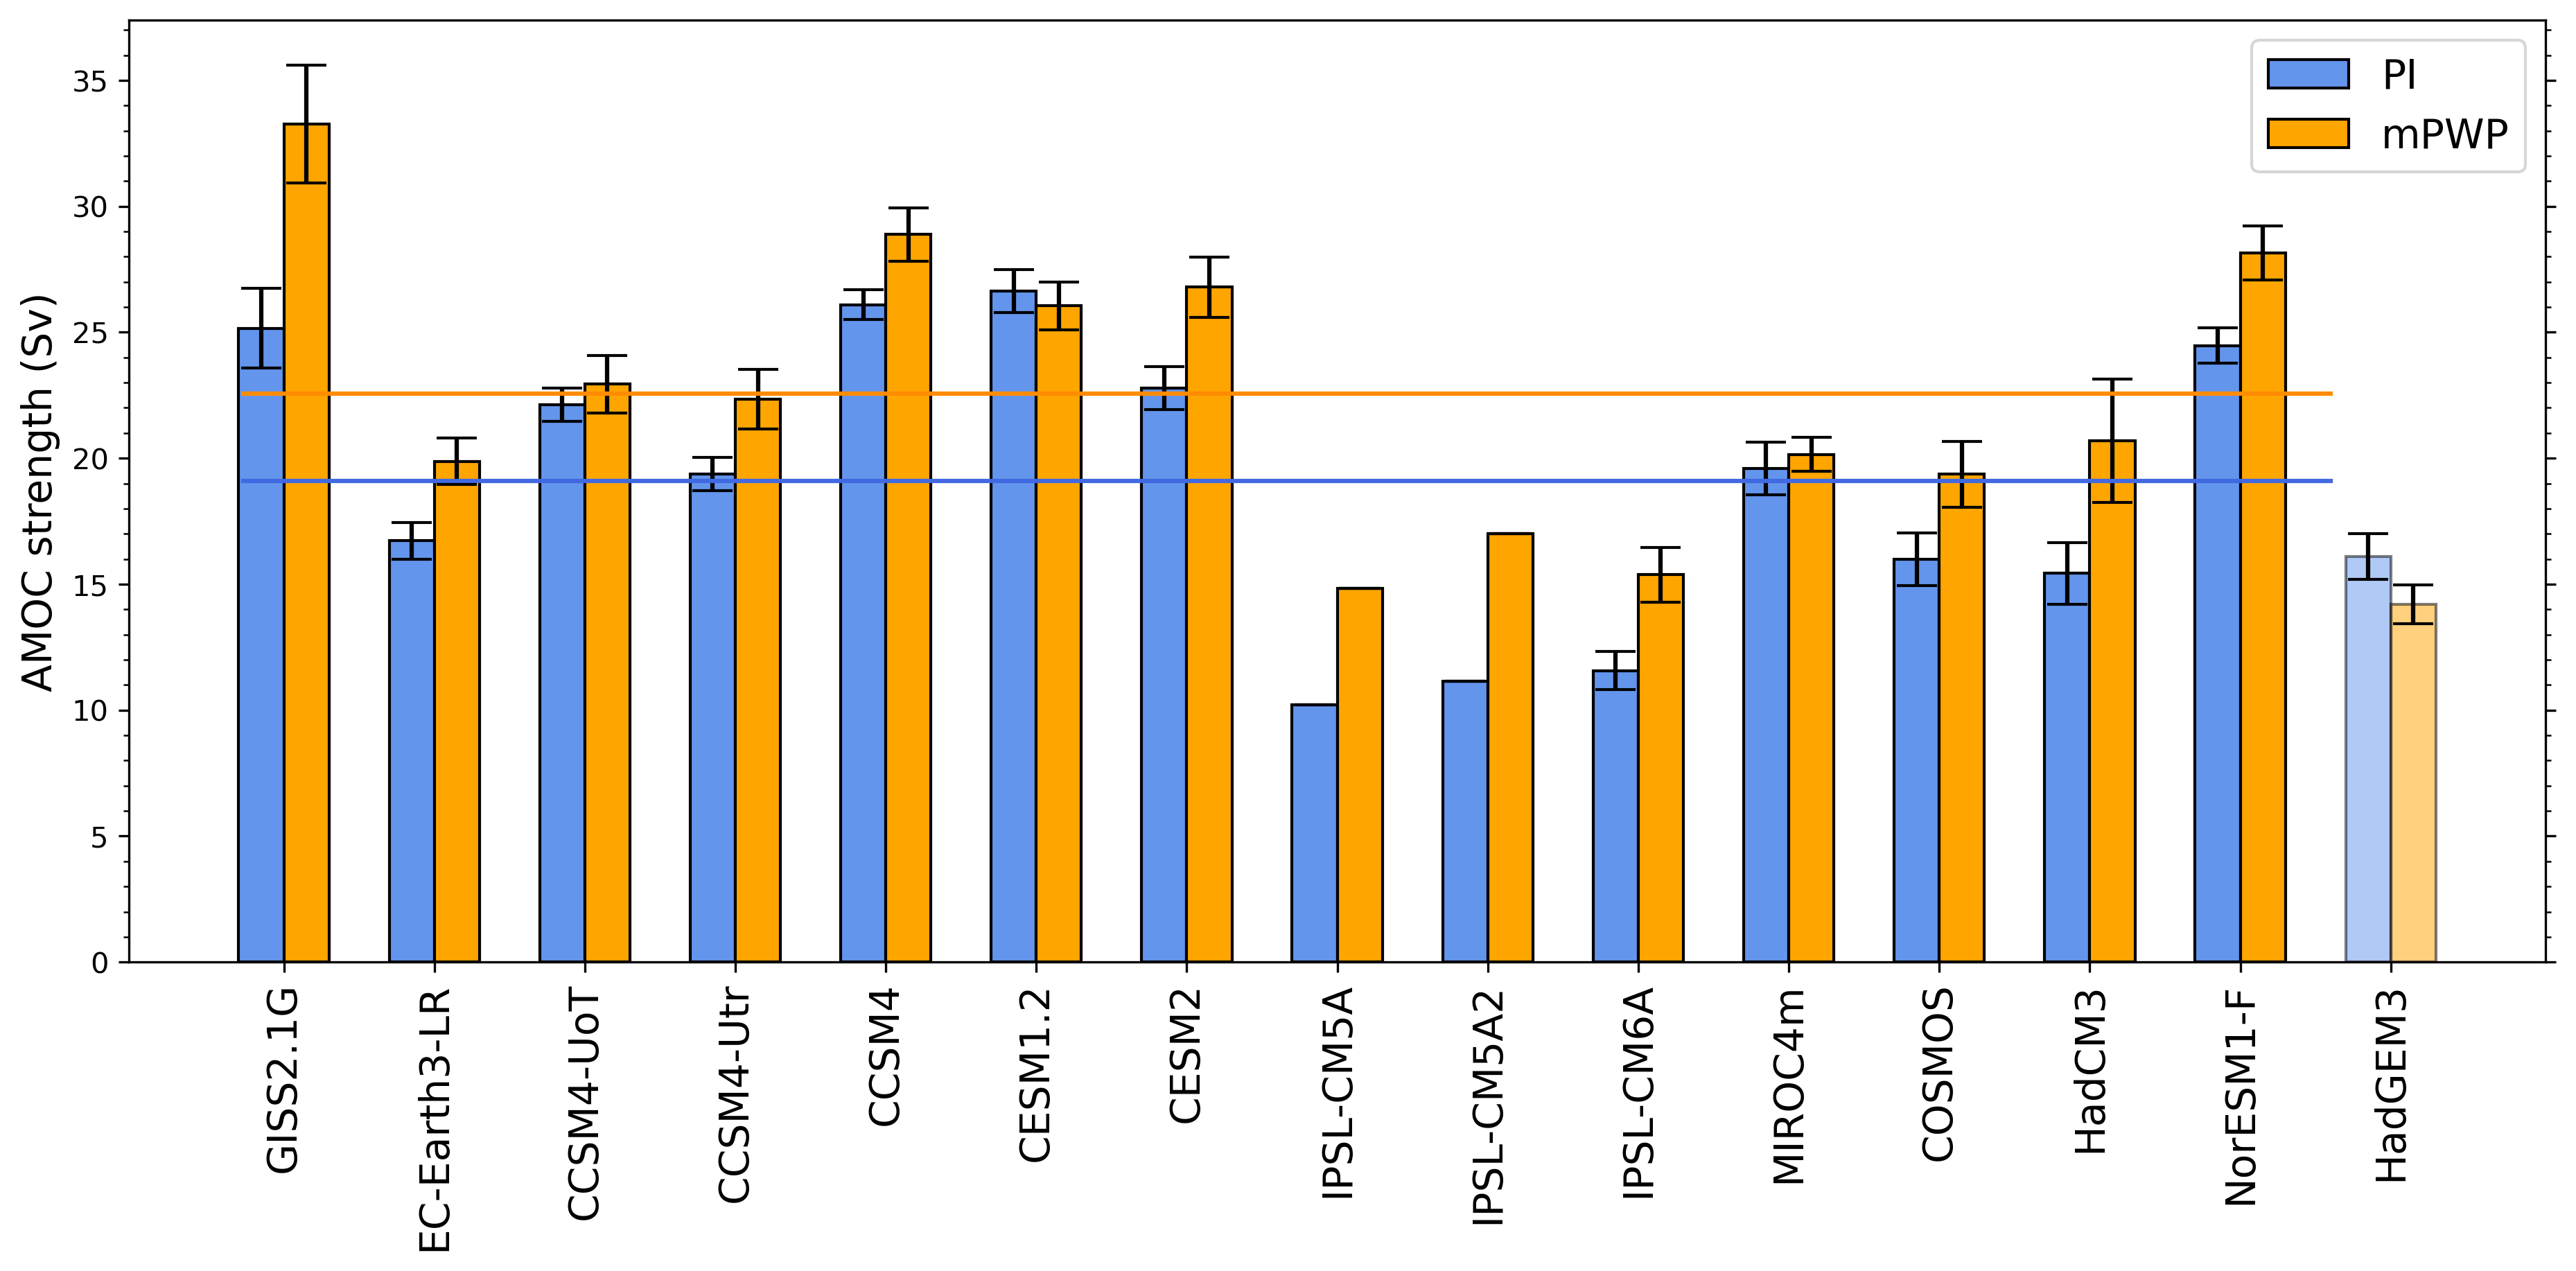

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(15,6), dpi=300)

plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.rcParams['axes.labelsize'] = 14

barWidth = 0.3
PI = amocE
Plio = amocEoi

# The x position of bars
r1 = np.arange(len(PI))
r2 = [x + barWidth for x in r1]

PIerror = stdE
Plioerror = stdEoi

ax.plot([-0.12, len(PI)-1.25], [np.mean(PI[:-1]),np.mean(PI[:-1])], color='royalblue')
ax.plot([-0.12, len(Plio)-1.25], [np.mean(Plio[:-1]),np.mean(Plio[:-1])], color='darkorange')
ax.bar(r1[:-1], PI[:-1], yerr = PIerror[:-1], width = barWidth, color = 'cornflowerblue', edgecolor = 'black', capsize=7, label='PI')
ax.bar(r2[:-1], Plio[:-1], yerr = Plioerror[:-1], width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='mPWP')
ax.bar(r1[-1], PI[-1], yerr = PIerror[-1], width = barWidth, color = 'cornflowerblue', edgecolor = 'black', capsize=7, alpha=0.5)
ax.bar(r2[-1], Plio[-1], yerr = Plioerror[-1], width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, alpha=0.5)
ax.set_xticks([r + 0.5*barWidth for r in range(len(PI))])
ax.set_xticklabels(modellist, rotation='vertical', fontsize=14)
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(which='minor', bottom=False)
ax.set_ylabel('AMOC strength (Sv)', fontsize=14)
ax.legend(fontsize=14)
plt.savefig('fig01.png', bbox_inches='tight')